In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from torchtext.data import get_tokenizer
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from helper_func_and_classes import create_dataset_list

In [2]:
pos_data = create_dataset_list("./twitter-datasets/train_pos_full.txt")
neg_data = create_dataset_list("./twitter-datasets/train_neg_full.txt")
test_data = create_dataset_list("./twitter-datasets/test_data.txt")

In [3]:
full_data = pos_data + neg_data + test_data
full_data_list = []
[full_data_list.extend(sentence.split(" ")) for sentence in full_data]
print("Number of unique words in the corpus: ", len(set(full_data_list)))

full_data_list_lower = []
[full_data_list_lower.extend(sentence.split(" ")) for sentence in full_data]
full_data_list_lower = [word.lower() for word in full_data_list_lower]
print("Number of unique lowered words in the corpus: ", len(set(full_data_list_lower)))

Number of unique words in the corpus:  604014
Number of unique lowered words in the corpus:  604014


# Distribution for number of characters

In [4]:
pos_sentence_length = np.array([len(sentence) for sentence in pos_data])
neg_sentence_length = np.array([len(sentence) for sentence in neg_data])

pos_max_value = np.amax(pos_sentence_length)
neg_max_value = np.amax(neg_sentence_length)

# POSITIVE TWEETS
print("POSITIVE TWEETS")
print(f"Number of tweets: ", len(pos_sentence_length) )
print(f"Maximum number of characters:", pos_max_value)
print(f"Mean number of characters: ", pos_sentence_length.mean())
print(f"Median number of characters:", np.median(pos_sentence_length))

# NEGATIVE TWEETS
print("\nNEGATIVE TWEETS")
print(f"Number of tweets: ", len(neg_sentence_length) )
print(f"Maximum number of characters:", neg_max_value)
print(f"Mean number of characters for: ", neg_sentence_length.mean())
print(f"Median number of characters:", np.median(neg_sentence_length))

POSITIVE TWEETS
Number of tweets:  1250000
Maximum number of characters: 401
Mean number of characters:  67.835752
Median number of characters: 63.0

NEGATIVE TWEETS
Number of tweets:  1250000
Maximum number of characters: 323
Mean number of characters for:  84.0923984
Median number of characters: 85.0


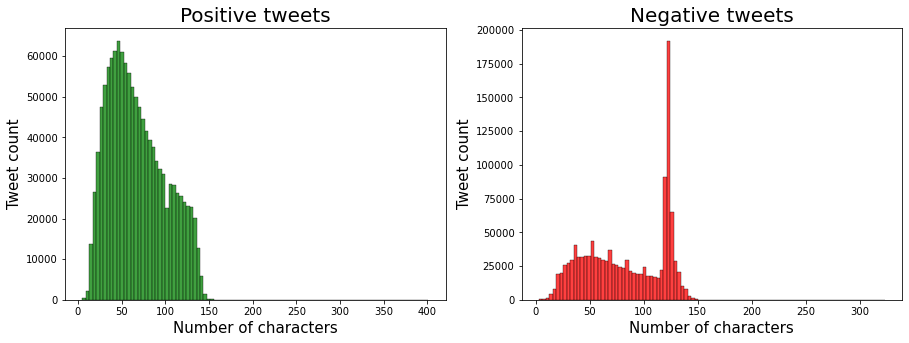

In [5]:
fig, axes = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)


sns.histplot(pos_sentence_length, bins=100, color='green', ax=axes[0])
sns.histplot(neg_sentence_length, bins=100, color='red', ax=axes[1]);
axes[0].set_xlabel('Number of characters', size=15)
axes[0].set_ylabel('Tweet count', size=15)
axes[0].set_title("Positive tweets", size=20)
axes[1].set_xlabel('Number of characters', size=15)
axes[1].set_ylabel('Tweet count', size=15)
axes[1].set_title("Negative tweets", size=20);

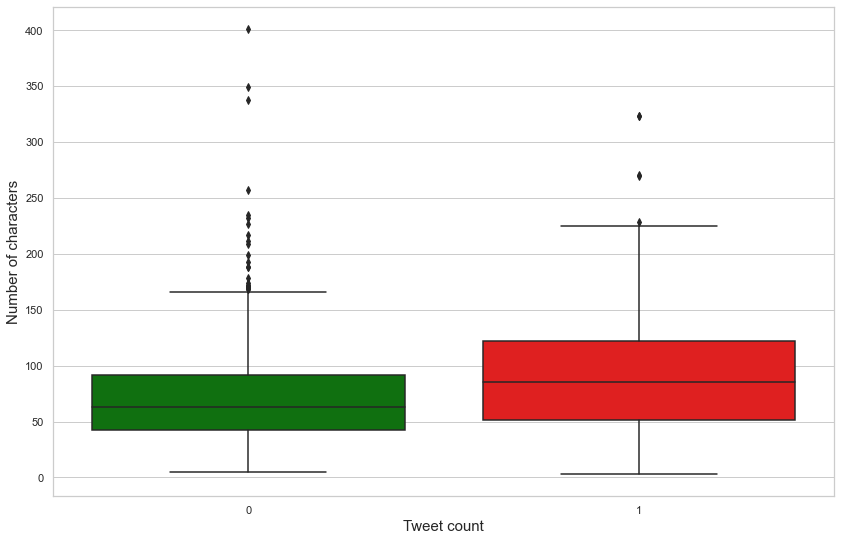

In [6]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(14,9))
sns.boxplot(ax=ax, data=[pos_sentence_length, neg_sentence_length], palette=['green', 'red'])
ax.set_xlabel("Tweet count", size=15);
ax.set_ylabel("Number of characters", size=15);





# Distribution for number of words

In [7]:
pos_sentence_tokenized_length = np.array([len(sentence.split(" ")) for sentence in pos_data])
neg_sentence_tokenized_length = np.array([len(sentence.split(" ")) for sentence in neg_data])

In [8]:
pos_max_word_length = np.amax(pos_sentence_tokenized_length)
neg_max_word_length = np.amax(neg_sentence_tokenized_length) 

# POSITIVE TWEETS
print("POSITIVE TWEETS")
print(f"Maximum number of words:", pos_max_word_length)
print(f"Mean number of words: ", pos_sentence_tokenized_length.mean())
print(f"Median number of words:", np.median(pos_sentence_tokenized_length))

# NEGATIVE TWEETS
print("\nNEGATIVE TWEETS")
print(f"Maximum number of words:", neg_max_word_length)
print(f"Mean number of words: ", neg_sentence_tokenized_length.mean())
print(f"Median number of wrods:", np.median(neg_sentence_tokenized_length))

POSITIVE TWEETS
Maximum number of words: 128
Mean number of words:  14.3415584
Median number of words: 13.0

NEGATIVE TWEETS
Maximum number of words: 104
Mean number of words:  17.142952
Median number of wrods: 18.0


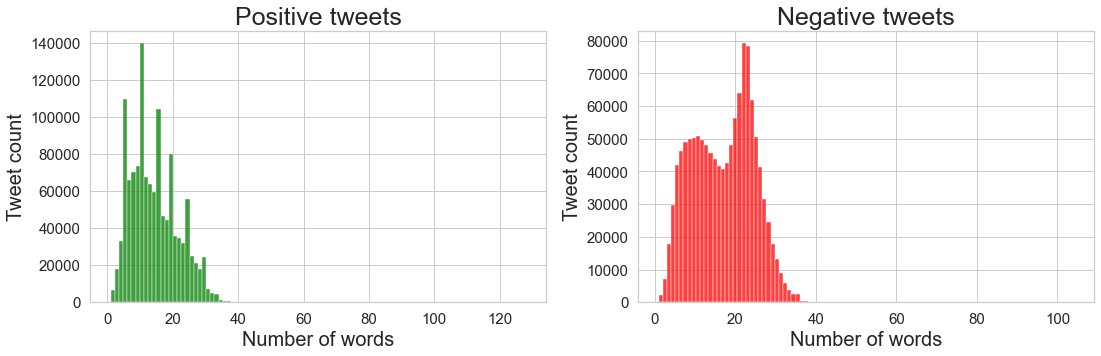

In [9]:
fig, axes = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(18)


sns.histplot(pos_sentence_tokenized_length, bins=100, color='green', ax=axes[0])
sns.histplot(neg_sentence_tokenized_length, bins=100, color='red', ax=axes[1]);
axes[0].set_xlabel('Number of words', size=20)
axes[0].set_ylabel('Tweet count', size=20)
axes[0].set_title("Positive tweets", size=25)
axes[1].set_xlabel('Number of words', size=20)
axes[1].set_ylabel('Tweet count', size=20)
axes[1].set_title("Negative tweets", size=25)
axes[0].tick_params(axis='both', which='major', labelsize=15);
axes[1].tick_params(axis='both', which='major', labelsize=15);

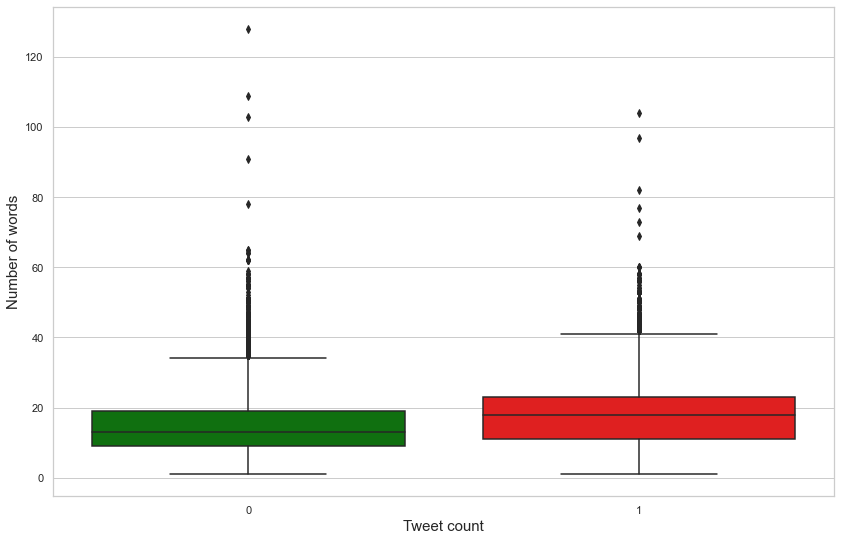

In [10]:

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(14,9))
sns.boxplot(ax= ax, data=[pos_sentence_tokenized_length, neg_sentence_tokenized_length], palette=['green', 'red'])
ax.set_xlabel("Tweet count", size=15);
ax.set_ylabel("Number of words", size=15);

## How many outliers are there <br>
**Defined as above 37 words per tweet**

In [11]:
pos_long_sentence_counter, neg_long_sentence_counter = 0, 0
for pos_sentence_length in pos_sentence_tokenized_length:
    if pos_sentence_length > 37:
        pos_long_sentence_counter += 1
pos_long_sentence_counter

948

In [12]:
for neg_sentence_length in neg_sentence_tokenized_length:
    if neg_sentence_length > 37:
        neg_long_sentence_counter += 1
neg_long_sentence_counter

1224

<br><br>
## Wordclouds for positive tweets (with stopwords)
Here we will try to get a bit better feel of how the distribution of the words are in the positive tweets. By making a wordcloud you can easily see what words have a high frequency in the dataset.

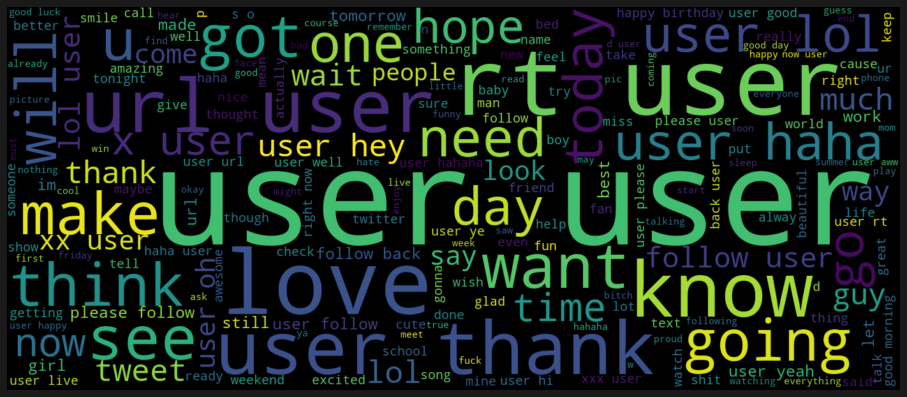

In [13]:
pos_text = " ".join(pos_data)
word_cloud = WordCloud(background_color='black',
                      height=600,
                      width=1400)
pos_wc_img = word_cloud.generate(pos_text)
plt.figure(figsize=(16,8), facecolor='k')
plt.imshow(pos_wc_img, interpolation='bilinear')
plt.axis("off");


## Wordclouds for negative tweets (with stopwords)
Here we will try to get a bit better feel of how the distribution of the words are in the negative tweets. By making a wordcloud you can easily see what words have a high frequency in the dataset.

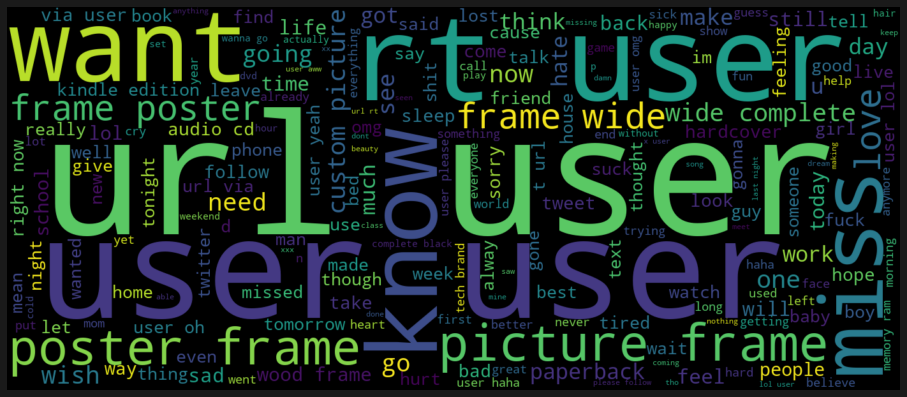

In [14]:
neg_text = " ".join(neg_data)
word_cloud = WordCloud(background_color='black',
                      height=600,
                      width=1400)
neg_wc_img = word_cloud.generate(neg_text)
plt.figure(figsize=(16,8), facecolor='k')
plt.imshow(neg_wc_img, interpolation='bilinear')
plt.axis("off");



## Wordclouds for positive tweets (removed stopwords and word user)
Here we will remove stopwords and the word user, since it seems to make a lot of noice in the data.

In [15]:
stopwords = list(STOPWORDS) + ['user']

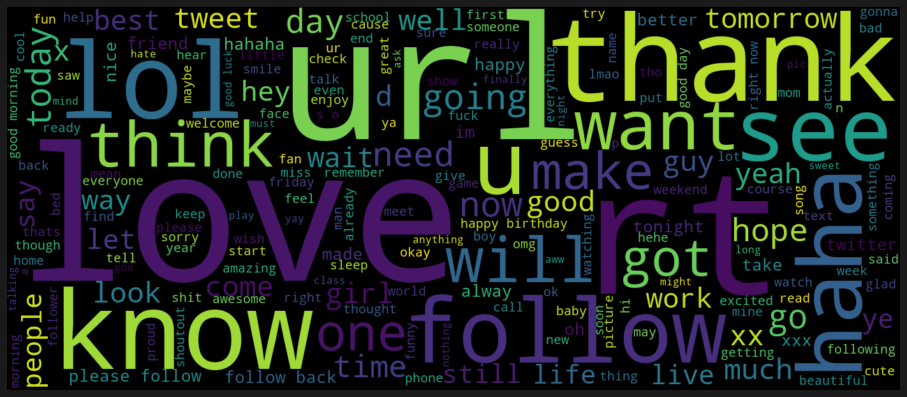

In [16]:
word_cloud = WordCloud(background_color='black',
                      height=600,
                      width=1400,
                      stopwords=stopwords)
pos_wc_img_sw = word_cloud.generate(pos_text)
plt.figure(figsize=(16,8), facecolor='k')
plt.imshow(pos_wc_img_sw, interpolation='bilinear')
plt.axis("off");



## Wordclouds for negative tweets (removed stopwords and word user)
Here we will remove stopwords and the word user, since it seems to make a lot of noice in the data

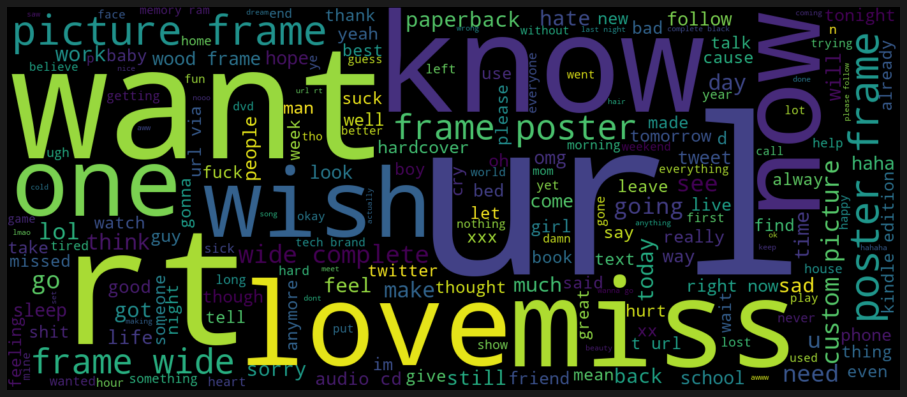

In [17]:
word_cloud = WordCloud(background_color='black',
                      height=600,
                      width=1400,
                      stopwords=stopwords)
neg_wc_img_sw = word_cloud.generate(neg_text)
plt.figure(figsize=(16,8), facecolor='k')
plt.imshow(neg_wc_img_sw, interpolation='bilinear')
plt.axis("off");